In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
lowess = sm.nonparametric.lowess
import statsmodels.formula.api as smf
from statsmodels.stats.anova import anova_lm

In [2]:
datatrain=pd.read_csv('NBA_Train.csv')
datatrain.set_index('Train_ID', inplace=True)
datatrain.head()

SALARY POSITION                   TEAM  Age  Games  Minutes  \
Train_ID                                                                   
1          2.489530       PF        Houston Rockets   22     76     2078   
2          2.433333       PG              Utah Jazz   24     73     1490   
3         20.158622       SF  Oklahoma City Thunder   25     81     3122   
4         12.404495       PG        Houston Rockets   26     62     2222   
5          1.500000       PG          Brooklyn Nets   21     48      489   

           PER     TS  ORB   DRB  ...   AST  STL  BLK   TOV   USG  ORtg  DRtg  \
Train_ID                          ...                                           
1         19.1  0.577  9.2  18.5  ...   7.0  1.3  3.5   8.2  18.3   119   105   
2         13.2  0.510  1.6  10.7  ...  28.8  1.7  0.1  14.3  19.0   105   109   
3         29.8  0.635  2.2  18.6  ...  26.7  1.7  1.5  12.2  33.0   123   104   
4         19.0  0.554  1.9   8.5  ...  38.2  2.2  0.3  16.9  22.7   113   110   
5          8.3  0.446  2.6   7.3  ...  20.4  2.7  0.2  20.9  17.4    90   110   

           OWS  DWS    WS  
Train_ID                   
1          4.6  2.7   7.3  
2          1.2  1.2   2.3  
3         14.8  4.4  19.2  
4          4.8  1.5   6.3  
5         -0.4  0.3  -0.1  

[5 rows x 21 columns]

In [3]:
datatrain.describe()

SALARY         Age       Games      Minutes         PER  \
count  126.000000  126.000000  126.000000   126.000000  126.000000   
mean     6.784165   26.682540   69.460317  1809.015873   14.964286   
std      5.647912    4.080492   11.433040   703.561511    4.306320   
min      0.111444   19.000000   40.000000   393.000000    6.300000   
25%      2.385205   23.000000   62.000000  1290.250000   12.425000   
50%      4.500000   26.000000   72.500000  1859.000000   14.000000   
75%      9.591416   29.000000   79.000000  2405.000000   16.750000   
max     22.970500   37.000000   82.000000  3122.000000   29.800000   

               TS         ORB         DRB         TRB         AST         STL  \
count  126.000000  126.000000  126.000000  126.000000  126.000000  126.000000   
mean     0.542540    5.154762   15.116667   10.136508   14.457143    1.587302   
std      0.045747    3.825422    6.018475    4.626646    9.821083    0.617606   
min      0.446000    1.000000    6.200000    4.100000    2.100000    0.200000   
25%      0.510000    2.125000   10.125000    6.025000    7.025000    1.125000   
50%      0.540000    3.700000   13.800000    9.200000   11.250000    1.500000   
75%      0.567750    7.300000   19.200000   13.900000   19.975000    2.000000   
max      0.730000   17.500000   32.100000   22.300000   44.300000    3.800000   

              BLK         TOV         USG        ORtg        DRtg         OWS  \
count  126.000000  126.000000  126.000000  126.000000  126.000000  126.000000   
mean     1.522222   13.486508   19.989683  107.182540  106.865079    2.337302   
std      1.359464    4.156602    4.962094    7.589889    3.679898    2.639507   
min      0.000000    7.200000    9.300000   88.000000   97.000000   -0.900000   
25%      0.600000   10.400000   16.425000  102.000000  104.000000    0.600000   
50%      1.100000   12.500000   19.100000  107.000000  107.000000    1.650000   
75%      1.875000   15.500000   23.275000  112.000000  110.000000    3.300000   
max      7.400000   28.800000   33.000000  130.000000  115.000000   14.800000   

              DWS         WS  
count  126.000000  126.00000  
mean     1.839683    4.18254  
std      1.178683    3.40273  
min      0.000000   -0.10000  
25%      0.900000    1.72500  
50%      1.600000    3.15000  
75%      2.475000    5.57500  
max      6.400000   19.20000

In [4]:
datatest=pd.read_csv('NBA_Test.csv')
datatest.set_index('Test_ID', inplace=True)
datatest.head()

SALARY POSITION                  TEAM  Age  Games  Minutes   PER  \
Test_ID                                                                        
1        18.671659       PF         Atlanta Hawks   28     74     2482  19.8   
2         5.250000        C     San Antonio Spurs   37     74     2158  21.3   
3         3.376000       SF  Los Angeles Clippers   36     75     2098  16.8   
4         3.425510       SG        Boston Celtics   25     81     2457  12.4   
5        10.449438       SF        Denver Nuggets   26     62     1927  12.4   

            TS  ORB   DRB  ...   AST  STL  BLK   TOV   USG  ORtg  DRtg  OWS  \
Test_ID                    ...                                                
1        0.545  7.2  21.9  ...  16.2  2.6  2.5  13.2  25.7   105   102  2.7   
2        0.535  8.6  28.3  ...  16.0  1.0  4.6  13.2  25.2   106    98  2.8   
3        0.595  1.5  18.3  ...  14.5  2.2  1.2  15.3  22.4   109   106  2.9   
4        0.498  2.7  15.7  ...  17.8  1.3  0.2  14.3  23.2    97   109 -0.5   
5        0.526  3.2  13.3  ...   9.3  1.2  1.2   8.9  19.5   107   110  1.8   

         DWS   WS  
Test_ID            
1        4.0  6.7  
2        4.6  7.4  
3        2.3  5.2  
4        1.8  1.4  
5        1.2  3.1  

[5 rows x 21 columns]

In [5]:
datatest.describe()

SALARY         Age       Games      Minutes         PER  \
count  127.000000  127.000000  127.000000   127.000000  127.000000   
mean     6.713162   25.393701   68.803150  1749.212598   14.784252   
std      5.483248    3.532519   12.072558   714.750469    4.110737   
min      0.055722   19.000000   40.000000   265.000000    5.300000   
25%      2.704120   23.000000   62.000000  1187.500000   12.000000   
50%      5.378974   25.000000   72.000000  1850.000000   14.600000   
75%     10.175000   28.000000   79.000000  2290.000000   17.050000   
max     24.894863   37.000000   82.000000  3023.000000   26.500000   

               TS         ORB         DRB         TRB         AST         STL  \
count  127.000000  127.000000  127.000000  127.000000  127.000000  127.000000   
mean     0.539071    5.626772   15.255118   10.456693   14.058268    1.616535   
std      0.047420    3.940318    6.357881    4.907228    8.998849    0.651222   
min      0.390000    0.800000    6.400000    3.800000    1.100000    0.300000   
25%      0.512500    2.200000    9.900000    6.300000    7.400000    1.150000   
50%      0.538000    4.300000   13.300000    9.200000   10.900000    1.500000   
75%      0.570000    8.750000   19.600000   14.550000   18.800000    2.000000   
max      0.695000   14.000000   33.800000   23.000000   48.900000    3.500000   

              BLK         TOV         USG        ORtg        DRtg         OWS  \
count  127.000000  127.000000  127.000000  127.000000  127.000000  127.000000   
mean     1.729921   13.390551   19.188189  107.409449  106.314961    2.093701   
std      1.649161    3.620038    4.760246    7.967548    3.961523    2.021698   
min      0.100000    3.300000    9.600000   85.000000   96.000000   -1.800000   
25%      0.500000   10.900000   15.150000  103.500000  104.000000    0.700000   
50%      1.100000   12.900000   19.000000  107.000000  107.000000    1.600000   
75%      2.450000   15.400000   22.600000  112.000000  109.000000    3.150000   
max      8.100000   24.200000   34.400000  135.000000  115.000000    9.000000   

              DWS          WS  
count  127.000000  127.000000  
mean     1.855118    3.949606  
std      1.202821    2.821541  
min      0.000000   -0.900000  
25%      0.900000    1.800000  
50%      1.700000    3.400000  
75%      2.500000    5.600000  
max      6.600000   12.200000

# 2. Data processing 

In [6]:
datatraincleaning = datatrain[['SALARY','POSITION','TEAM','Age','Games','Minutes','PER','TS','ORB','DRB','TRB','AST','STL','BLK','TOV','USG','ORtg','DRtg','OWS','DWS','WS']].dropna()
datatestcleaning = datatest[['SALARY','POSITION','TEAM','Age','Games','Minutes','PER','TS','ORB','DRB','TRB','AST','STL','BLK','TOV','USG','ORtg','DRtg','OWS','DWS','WS']].dropna()

In [7]:
datatraincleaning.describe()

SALARY         Age       Games      Minutes         PER  \
count  126.000000  126.000000  126.000000   126.000000  126.000000   
mean     6.784165   26.682540   69.460317  1809.015873   14.964286   
std      5.647912    4.080492   11.433040   703.561511    4.306320   
min      0.111444   19.000000   40.000000   393.000000    6.300000   
25%      2.385205   23.000000   62.000000  1290.250000   12.425000   
50%      4.500000   26.000000   72.500000  1859.000000   14.000000   
75%      9.591416   29.000000   79.000000  2405.000000   16.750000   
max     22.970500   37.000000   82.000000  3122.000000   29.800000   

               TS         ORB         DRB         TRB         AST         STL  \
count  126.000000  126.000000  126.000000  126.000000  126.000000  126.000000   
mean     0.542540    5.154762   15.116667   10.136508   14.457143    1.587302   
std      0.045747    3.825422    6.018475    4.626646    9.821083    0.617606   
min      0.446000    1.000000    6.200000    4.100000    2.100000    0.200000   
25%      0.510000    2.125000   10.125000    6.025000    7.025000    1.125000   
50%      0.540000    3.700000   13.800000    9.200000   11.250000    1.500000   
75%      0.567750    7.300000   19.200000   13.900000   19.975000    2.000000   
max      0.730000   17.500000   32.100000   22.300000   44.300000    3.800000   

              BLK         TOV         USG        ORtg        DRtg         OWS  \
count  126.000000  126.000000  126.000000  126.000000  126.000000  126.000000   
mean     1.522222   13.486508   19.989683  107.182540  106.865079    2.337302   
std      1.359464    4.156602    4.962094    7.589889    3.679898    2.639507   
min      0.000000    7.200000    9.300000   88.000000   97.000000   -0.900000   
25%      0.600000   10.400000   16.425000  102.000000  104.000000    0.600000   
50%      1.100000   12.500000   19.100000  107.000000  107.000000    1.650000   
75%      1.875000   15.500000   23.275000  112.000000  110.000000    3.300000   
max      7.400000   28.800000   33.000000  130.000000  115.000000   14.800000   

              DWS         WS  
count  126.000000  126.00000  
mean     1.839683    4.18254  
std      1.178683    3.40273  
min      0.000000   -0.10000  
25%      0.900000    1.72500  
50%      1.600000    3.15000  
75%      2.475000    5.57500  
max      6.400000   19.20000

In [8]:
datatestcleaning.describe()

SALARY         Age       Games      Minutes         PER  \
count  127.000000  127.000000  127.000000   127.000000  127.000000   
mean     6.713162   25.393701   68.803150  1749.212598   14.784252   
std      5.483248    3.532519   12.072558   714.750469    4.110737   
min      0.055722   19.000000   40.000000   265.000000    5.300000   
25%      2.704120   23.000000   62.000000  1187.500000   12.000000   
50%      5.378974   25.000000   72.000000  1850.000000   14.600000   
75%     10.175000   28.000000   79.000000  2290.000000   17.050000   
max     24.894863   37.000000   82.000000  3023.000000   26.500000   

               TS         ORB         DRB         TRB         AST         STL  \
count  127.000000  127.000000  127.000000  127.000000  127.000000  127.000000   
mean     0.539071    5.626772   15.255118   10.456693   14.058268    1.616535   
std      0.047420    3.940318    6.357881    4.907228    8.998849    0.651222   
min      0.390000    0.800000    6.400000    3.800000    1.100000    0.300000   
25%      0.512500    2.200000    9.900000    6.300000    7.400000    1.150000   
50%      0.538000    4.300000   13.300000    9.200000   10.900000    1.500000   
75%      0.570000    8.750000   19.600000   14.550000   18.800000    2.000000   
max      0.695000   14.000000   33.800000   23.000000   48.900000    3.500000   

              BLK         TOV         USG        ORtg        DRtg         OWS  \
count  127.000000  127.000000  127.000000  127.000000  127.000000  127.000000   
mean     1.729921   13.390551   19.188189  107.409449  106.314961    2.093701   
std      1.649161    3.620038    4.760246    7.967548    3.961523    2.021698   
min      0.100000    3.300000    9.600000   85.000000   96.000000   -1.800000   
25%      0.500000   10.900000   15.150000  103.500000  104.000000    0.700000   
50%      1.100000   12.900000   19.000000  107.000000  107.000000    1.600000   
75%      2.450000   15.400000   22.600000  112.000000  109.000000    3.150000   
max      8.100000   24.200000   34.400000  135.000000  115.000000    9.000000   

              DWS          WS  
count  127.000000  127.000000  
mean     1.855118    3.949606  
std      1.202821    2.821541  
min      0.000000   -0.900000  
25%      0.900000    1.800000  
50%      1.700000    3.400000  
75%      2.500000    5.600000  
max      6.600000   12.200000

# 3. Exploratory data analysis

Text(0.5, 1.0, 'SALARY Histogram')

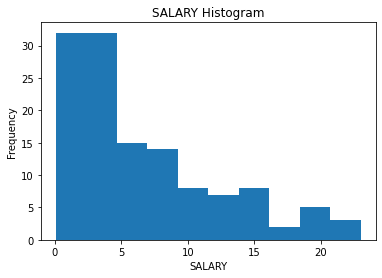

In [9]:
# for figure 3.3
plt.hist(datatrain['SALARY'])
plt.ylabel('Frequency')
plt.xlabel('SALARY')
plt.title('SALARY Histogram')


Text(0.5, 1.0, 'SALARY Boxplot')

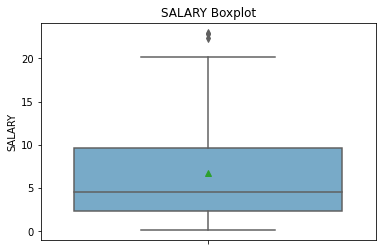

In [10]:
#for figure 3.2
ax = sns.boxplot(y='SALARY', data=datatrain, palette='Blues', showmeans=True)
ax.set_title('SALARY Boxplot')


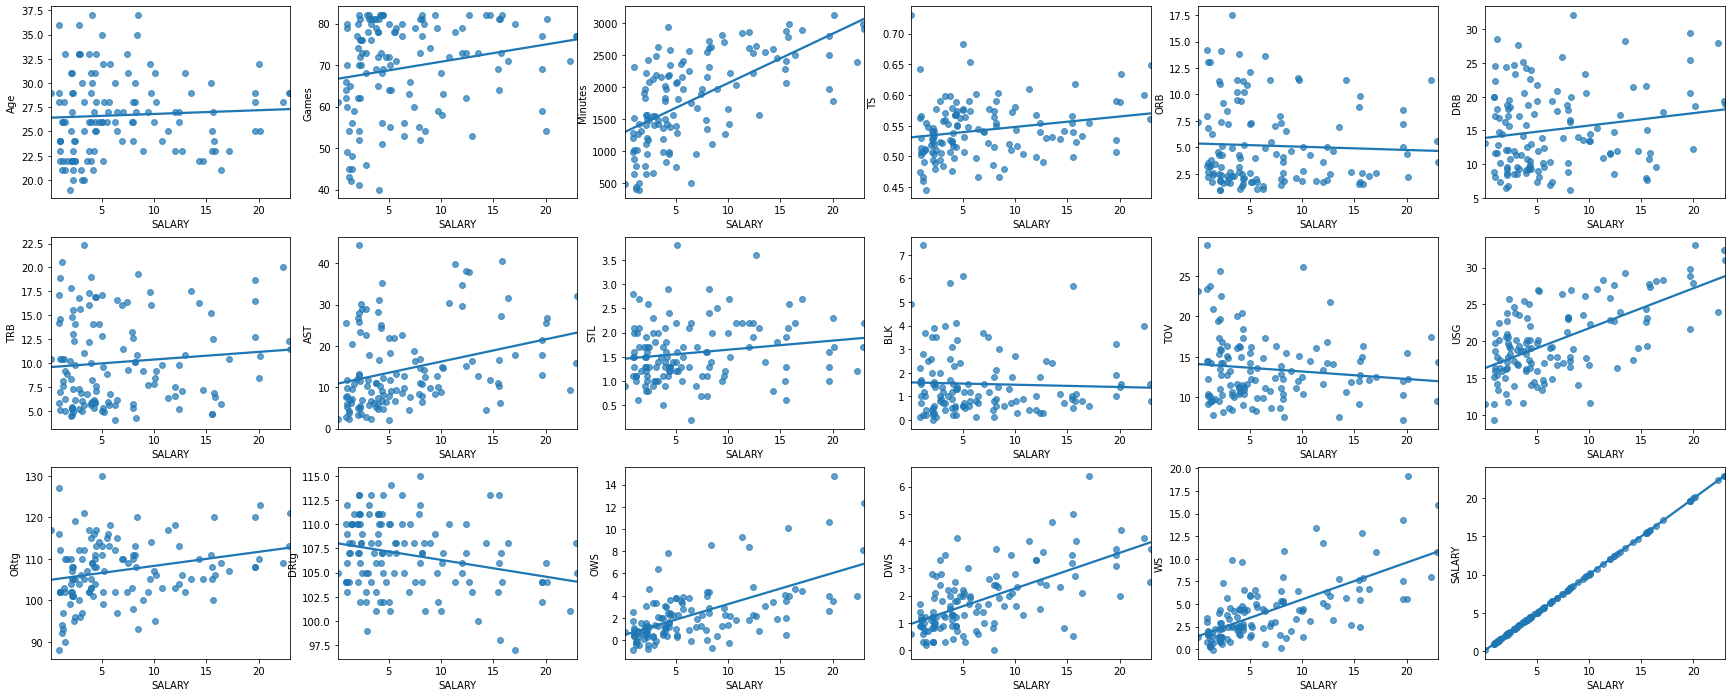

In [11]:
#for figure 3.1
tableau=['#1F77B4']
fig = plt.figure(figsize=(30,12)) 
ax1 = fig.add_subplot(3,6,1) 
ax2 = fig.add_subplot(3,6,2) 
ax3 = fig.add_subplot(3,6,3) 
ax4 = fig.add_subplot(3,6,4) 
ax5 = fig.add_subplot(3,6,5) 
ax6 = fig.add_subplot(3,6,6)
ax7 = fig.add_subplot(3,6,7)
ax8 = fig.add_subplot(3,6,8)
ax9 = fig.add_subplot(3,6,9)
ax10 = fig.add_subplot(3,6,10)
ax11 = fig.add_subplot(3,6,11)
ax12 = fig.add_subplot(3,6,12)
ax13 = fig.add_subplot(3,6,13)
ax14 = fig.add_subplot(3,6,14)
ax15 = fig.add_subplot(3,6,15)
ax16 = fig.add_subplot(3,6,16)
ax17 = fig.add_subplot(3,6,17)
ax18 = fig.add_subplot(3,6,18)

sns.regplot(datatrain['SALARY'], datatrain['Age'], ci=None, scatter_kws={'s': 35, 'color': tableau[0], 'alpha': 
0.7}, ax=ax1) 


sns.regplot(datatrain['SALARY'], datatrain['Games'], ci=None, scatter_kws={'s': 35, 'color': tableau[0], 'alpha': 
0.7}, ax=ax2) 


sns.regplot(datatrain['SALARY'], datatrain['Minutes'], ci=None, scatter_kws={'s': 35, 'color': tableau[0], 'alpha': 
0.7}, ax=ax3) 

sns.regplot(datatrain['SALARY'], datatrain['TS'], ci=None, scatter_kws={'s': 35, 'color': tableau[0], 'alpha': 
0.7}, ax=ax4) 

sns.regplot(datatrain['SALARY'], datatrain['ORB'], ci=None, scatter_kws={'s': 35, 'color': tableau[0], 'alpha': 
0.7}, ax=ax5) 

sns.regplot(datatrain['SALARY'], datatrain['DRB'], ci=None, scatter_kws={'s': 35, 'color': tableau[0], 'alpha': 
0.7}, ax=ax6) 

sns.regplot(datatrain['SALARY'], datatrain['TRB'], ci=None, scatter_kws={'s': 35, 'color': tableau[0], 'alpha': 
0.7}, ax=ax7) 

sns.regplot(datatrain['SALARY'], datatrain['AST'], ci=None, scatter_kws={'s': 35, 'color': tableau[0], 'alpha': 
0.7}, ax=ax8)

sns.regplot(datatrain['SALARY'], datatrain['STL'], ci=None, scatter_kws={'s': 35, 'color': tableau[0], 'alpha': 
0.7}, ax=ax9) 

sns.regplot(datatrain['SALARY'], datatrain['BLK'], ci=None, scatter_kws={'s': 35, 'color': tableau[0], 'alpha': 
0.7}, ax=ax10)

sns.regplot(datatrain['SALARY'], datatrain['TOV'], ci=None, scatter_kws={'s': 35, 'color': tableau[0], 'alpha': 
0.7}, ax=ax11)

sns.regplot(datatrain['SALARY'], datatrain['USG'], ci=None, scatter_kws={'s': 35, 'color': tableau[0], 'alpha': 
0.7}, ax=ax12)

sns.regplot(datatrain['SALARY'], datatrain['ORtg'], ci=None, scatter_kws={'s': 35, 'color': tableau[0], 'alpha': 
0.7}, ax=ax13) 

sns.regplot(datatrain['SALARY'], datatrain['DRtg'], ci=None, scatter_kws={'s': 35, 'color': tableau[0], 'alpha': 
0.7}, ax=ax14)

sns.regplot(datatrain['SALARY'], datatrain['OWS'], ci=None, scatter_kws={'s': 35, 'color': tableau[0], 'alpha': 
0.7}, ax=ax15) 

sns.regplot(datatrain['SALARY'], datatrain['DWS'], ci=None, scatter_kws={'s': 35, 'color': tableau[0], 'alpha': 
0.7}, ax=ax16) 

sns.regplot(datatrain['SALARY'], datatrain['WS'], ci=None, scatter_kws={'s': 35, 'color': tableau[0], 'alpha': 
0.7}, ax=ax17) 

sns.regplot(datatrain['SALARY'], datatrain['SALARY'], ci=None, scatter_kws={'s': 35, 'color': tableau[0], 'alpha': 
0.7}, ax=ax18) 


In [12]:
#for table 3.1
correlations = datatrain[['SALARY','POSITION','TEAM','Age','Games','Minutes','PER','TS','ORB','DRB','TRB','AST','STL','BLK','TOV','USG','ORtg','DRtg','OWS','DWS','WS']].corr()
correlations


SALARY       Age     Games   Minutes       PER        TS       ORB  \
SALARY   1.000000  0.053676  0.205137  0.621254  0.670230  0.210184 -0.044877   
Age      0.053676  1.000000 -0.130769 -0.011434  0.103061  0.230423 -0.079392   
Games    0.205137 -0.130769  1.000000  0.698624  0.218672  0.222303 -0.038261   
Minutes  0.621254 -0.011434  0.698624  1.000000  0.542884  0.237121 -0.282746   
PER      0.670230  0.103061  0.218672  0.542884  1.000000  0.496454  0.120051   
TS       0.210184  0.230423  0.222303  0.237121  0.496454  1.000000  0.046193   
ORB     -0.044877 -0.079392 -0.038261 -0.282746  0.120051  0.046193  1.000000   
DRB      0.173453  0.051784 -0.069277 -0.132087  0.333870  0.001943  0.752383   
TRB      0.097399  0.005450 -0.060513 -0.204198  0.270223  0.026319  0.902298   
AST      0.310137  0.085238  0.053769  0.401013  0.372109 -0.023851 -0.500145   
STL      0.171666 -0.007326 -0.010948  0.195099  0.148331  0.037649 -0.346304   
BLK     -0.040450 -0.034628 -0.096862 -0.234893  0.097884  0.138450  0.637900   
TOV     -0.125629  0.069458 -0.170734 -0.220080 -0.199870 -0.033859  0.117903   
USG      0.619584  0.032315  0.137996  0.495164  0.746413  0.032106 -0.170674   
ORtg     0.251895  0.167721  0.283067  0.344656  0.592335  0.859295  0.087906   
DRtg    -0.265725 -0.117421 -0.108988 -0.022222 -0.301439 -0.098838 -0.482068   
OWS      0.598172  0.044857  0.387794  0.661218  0.827359  0.607907 -0.085542   
DWS      0.626173  0.077324  0.488990  0.667567  0.591449  0.216021  0.115089   
WS       0.677791  0.060614  0.470376  0.742716  0.844352  0.544868 -0.028135   

              DRB       TRB       AST       STL       BLK       TOV       USG  \
SALARY   0.173453  0.097399  0.310137  0.171666 -0.040450 -0.125629  0.619584   
Age      0.051784  0.005450  0.085238 -0.007326 -0.034628  0.069458  0.032315   
Games   -0.069277 -0.060513  0.053769 -0.010948 -0.096862 -0.170734  0.137996   
Minutes -0.132087 -0.204198  0.401013  0.195099 -0.234893 -0.220080  0.495164   
PER      0.333870  0.270223  0.372109  0.148331  0.097884 -0.199870  0.746413   
TS       0.001943  0.026319 -0.023851  0.037649  0.138450 -0.033859  0.032106   
ORB      0.752383  0.902298 -0.500145 -0.346304  0.637900  0.117903 -0.170674   
DRB      1.000000  0.962146 -0.383586 -0.327730  0.601262 -0.034164  0.113351   
TRB      0.962146  1.000000 -0.455595 -0.359430  0.655234  0.028525  0.006648   
AST     -0.383586 -0.455595  1.000000  0.452049 -0.447390  0.350265  0.417018   
STL     -0.327730 -0.359430  0.452049  1.000000 -0.296750  0.249050  0.036607   
BLK      0.601262  0.655234 -0.447390 -0.296750  1.000000  0.117206 -0.187117   
TOV     -0.034164  0.028525  0.350265  0.249050  0.117206  1.000000 -0.318169   
USG      0.113351  0.006648  0.417018  0.036607 -0.187117 -0.318169  1.000000   
ORtg    -0.005146  0.035827  0.097191  0.062108  0.031470 -0.222007  0.078411   
DRtg    -0.571812 -0.582690  0.144385 -0.077144 -0.491291 -0.114974 -0.068686   
OWS      0.055663  0.005620  0.358323  0.120771 -0.118350 -0.212208  0.527502   
DWS      0.297673  0.249047  0.210467  0.210929  0.146427 -0.064977  0.404712   
WS       0.143840  0.088363  0.350021  0.168074 -0.043427 -0.187887  0.548738   

             ORtg      DRtg       OWS       DWS        WS  
SALARY   0.251895 -0.265725  0.598172  0.626173  0.677791  
Age      0.167721 -0.117421  0.044857  0.077324  0.060614  
Games    0.283067 -0.108988  0.387794  0.488990  0.470376  
Minutes  0.344656 -0.022222  0.661218  0.667567  0.742716  
PER      0.592335 -0.301439  0.827359  0.591449  0.844352  
TS       0.859295 -0.098838  0.607907  0.216021  0.544868  
ORB      0.087906 -0.482068 -0.085542  0.115089 -0.028135  
DRB     -0.005146 -0.571812  0.055663  0.297673  0.143840  
TRB      0.035827 -0.582690  0.005620  0.249047  0.088363  
AST      0.097191  0.144385  0.358323  0.210467  0.350021  
STL      0.062108 -0.077144  0.120771  0.210929  0.168074  
BLK      0.031470 -0.491291 -0.118350  0.146427 -

In [13]:
#for table 3.2
datatrain['SALARY'].describe()

count    126.000000
mean       6.784165
std        5.647912
min        0.111444
25%        2.385205
50%        4.500000
75%        9.591416
max       22.970500
Name: SALARY, dtype: float64

In [14]:
#for table 3.2
stats.describe(datatrain['SALARY'])

DescribeResult(nobs=126, minmax=(0.111444, 22.9705), mean=6.784165190476191, variance=31.898913625081814, skewness=1.1732505211737276, kurtosis=0.506884774016179)

In [15]:
#for table 3.2
datatrain['Games'].describe()

count    126.000000
mean      69.460317
std       11.433040
min       40.000000
25%       62.000000
50%       72.500000
75%       79.000000
max       82.000000
Name: Games, dtype: float64

In [16]:
#for table 3.2
stats.describe(datatrain['Games'])

DescribeResult(nobs=126, minmax=(40, 82), mean=69.46031746031746, variance=130.7144126984127, skewness=-0.7999462199057166, kurtosis=-0.382509361279479)

In [17]:
#for table 3.2
datatrain['Minutes'].describe()

count     126.000000
mean     1809.015873
std       703.561511
min       393.000000
25%      1290.250000
50%      1859.000000
75%      2405.000000
max      3122.000000
Name: Minutes, dtype: float64

In [18]:
#for table 3.2
stats.describe(datatrain['Minutes'])

DescribeResult(nobs=126, minmax=(393, 3122), mean=1809.015873015873, variance=494998.7997460318, skewness=-0.1633410462687048, kurtosis=-0.9482816281670363)

In [19]:
#for table 3.2
datatrain['PER'].describe()

count    126.000000
mean      14.964286
std        4.306320
min        6.300000
25%       12.425000
50%       14.000000
75%       16.750000
max       29.800000
Name: PER, dtype: float64

In [20]:
#for table 3.2
stats.describe(datatrain['PER'])

DescribeResult(nobs=126, minmax=(6.3, 29.8), mean=14.964285714285717, variance=18.54439428571429, skewness=0.9653302565812213, kurtosis=1.2729222247661145)

In [21]:
#for table 3.2
datatrain['ORB'].describe()

count    126.000000
mean       5.154762
std        3.825422
min        1.000000
25%        2.125000
50%        3.700000
75%        7.300000
max       17.500000
Name: ORB, dtype: float64

In [22]:
#for table 3.2
stats.describe(datatrain['ORB'])

DescribeResult(nobs=126, minmax=(1.0, 17.5), mean=5.154761904761905, variance=14.633857142857144, skewness=1.0331146665710103, kurtosis=0.07249749076584866)

In [23]:
#for table 3.2
datatrain['USG'].describe()

count    126.000000
mean      19.989683
std        4.962094
min        9.300000
25%       16.425000
50%       19.100000
75%       23.275000
max       33.000000
Name: USG, dtype: float64

In [24]:
#for table 3.2
stats.describe(datatrain['USG'])

DescribeResult(nobs=126, minmax=(9.3, 33.0), mean=19.989682539682537, variance=24.6223726984127, skewness=0.42145630180145227, kurtosis=-0.38205215996746045)

In [25]:
#for table 3.2
datatrain['OWS'].describe()

count    126.000000
mean       2.337302
std        2.639507
min       -0.900000
25%        0.600000
50%        1.650000
75%        3.300000
max       14.800000
Name: OWS, dtype: float64

In [26]:
#for table 3.2
stats.describe(datatrain['OWS'])

DescribeResult(nobs=126, minmax=(-0.9, 14.8), mean=2.337301587301587, variance=6.966997460317461, skewness=2.104977221823014, kurtosis=5.490375071715695)

In [27]:
#for table 3.2
datatrain['DWS'].describe()

count    126.000000
mean       1.839683
std        1.178683
min        0.000000
25%        0.900000
50%        1.600000
75%        2.475000
max        6.400000
Name: DWS, dtype: float64

In [28]:
#for table 3.2
stats.describe(datatrain['DWS'])

DescribeResult(nobs=126, minmax=(0.0, 6.4), mean=1.8396825396825396, variance=1.3892926984126985, skewness=0.9742106672128666, kurtosis=0.937084498206056)

In [29]:
#for table 3.2
datatrain['WS'].describe()

count    126.00000
mean       4.18254
std        3.40273
min       -0.10000
25%        1.72500
50%        3.15000
75%        5.57500
max       19.20000
Name: WS, dtype: float64

In [30]:
#for table 3.2
stats.describe(datatrain['WS'])

DescribeResult(nobs=126, minmax=(-0.1, 19.2), mean=4.182539682539682, variance=11.578572698412698, skewness=1.6949009564653126, kurtosis=3.56162732729664)

# 4. Variable selection, methodolody and modelling

### 4A. Linear regression 

In [31]:
#for table 4A.1
reg4A1 = smf.ols(formula = 'SALARY ~ Games + Minutes + USG + OWS + DWS +WS ', data =datatrain).fit()
reg4A1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 SALARY   R-squared:                       0.649
Model:                            OLS   Adj. R-squared:                  0.632
Method:                 Least Squares   F-statistic:                     36.71
Date:                Mon, 27 Sep 2021   Prob (F-statistic):           6.75e-25
Time:                        23:50:05   Log-Likelihood:                -330.42
No. Observations:                 126   AIC:                             674.8
Df Residuals:                     119   BIC:                             694.7
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.7651      2.717      1.018      0.311      -2.615       8.145
Games         -0.1597      0.040     -3.964      0.000      -0.239      -0.080
Minutes        0.0032      0.001      3.700      0.000       0.001       0.005
USG            0.2890      0.079      3.651      0.000       0.132       0.446
OWS           10.3867      5.924      1.753      0.082      -1.344      22.118
DWS           11.6419      5.903      1.972      0.051      -0.046      23.330
WS           -10.0738      5.928     -1.699      0.092     -21.811       1.664
==============================================================================
Omnibus:                        5.012   Durbin-Watson:                   1.821
Prob(Omnibus):                  0.082   Jarque-Bera (JB):                4.446
Skew:                           0.410   Prob(JB):                        0.108
Kurtosis:                       3.418   Cond. No.                     6.51e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.51e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [32]:
#for table 4A.1
features = datatrain[['Games','Minutes', 'USG','OWS', 'DWS', 'WS']]
features = sm.add_constant(features) 
features.head()

const  Games  Minutes   USG   OWS  DWS    WS
Train_ID                                              
1           1.0     76     2078  18.3   4.6  2.7   7.3
2           1.0     73     1490  19.0   1.2  1.2   2.3
3           1.0     81     3122  33.0  14.8  4.4  19.2
4           1.0     62     2222  22.7   4.8  1.5   6.3
5           1.0     48      489  17.4  -0.4  0.3  -0.1

In [33]:
#for table 4A.1
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = []
for i in range(6):
    vif.append(variance_inflation_factor(features.values, i+1))
print(vif)
np.mean(vif)

[2.2559036330802313, 3.915023712615537, 1.640806912558046, 2600.8901069060453, 514.8587535470305, 4327.061851796509]


1241.7704077513063

In [34]:
#for table 4A.2
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
kf=KFold(10)

linreg = LinearRegression()
scores1 = cross_val_score(linreg, datatrain[['Games','Minutes','USG','OWS']], datatrain[['SALARY']], cv=10, scoring = 'neg_mean_squared_error')
cv_score1 = np.mean(scores1)
cv_rmse1= np.sqrt(-cv_score1)

scores2 = cross_val_score(linreg, datatrain[['Games','Minutes','USG','DWS']], datatrain[['SALARY']], cv=10, scoring = 'neg_mean_squared_error')
cv_score2 = np.mean(scores2)
cv_rmse2= np.sqrt(-cv_score2)

scores3 = cross_val_score(linreg, datatrain[['Games','Minutes','USG','WS']], datatrain[['SALARY']], cv=10, scoring = 'neg_mean_squared_error')
cv_score3 = np.mean(scores3)
cv_rmse3= np.sqrt(-cv_score3)

print(cv_rmse1)
print(cv_rmse2)
print(cv_rmse3)

3.7867121986145658
3.56512586203456
3.6586305298458135


In [35]:
#for adding PER (below table 4A.2)
scores4 = cross_val_score(linreg, datatrain[['Games','Minutes','USG','DWS','PER']], datatrain[['SALARY']], cv=10, scoring = 'neg_mean_squared_error')
cv_score4 = np.mean(scores4)
cv_rmse4= np.sqrt(-cv_score4)

print(cv_rmse4)

3.6003169458473323


In [36]:
#for table 4A.3
reg4A3 = smf.ols(formula = 'SALARY ~ Games + Minutes + USG + DWS ', data =datatrain).fit()
reg4A3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 SALARY   R-squared:                       0.629
Model:                            OLS   Adj. R-squared:                  0.617
Method:                 Least Squares   F-statistic:                     51.37
Date:                Mon, 27 Sep 2021   Prob (F-statistic):           3.25e-25
Time:                        23:50:06   Log-Likelihood:                -333.89
No. Observations:                 126   AIC:                             677.8
Df Residuals:                     121   BIC:                             692.0
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.1032      2.707      0.777      0.439      -3.256       7.462
Games         -0.1721      0.041     -4.228      0.000      -0.253      -0.091
Minutes        0.0039      0.001      4.765      0.000       0.002       0.006
USG            0.3212      0.078      4.135      0.000       0.167       0.475
DWS            1.7149      0.360      4.765      0.000       1.002       2.427
==============================================================================
Omnibus:                        3.815   Durbin-Watson:                   1.887
Prob(Omnibus):                  0.148   Jarque-Bera (JB):                3.247
Skew:                           0.360   Prob(JB):                        0.197
Kurtosis:                       3.318   Cond. No.                     1.69e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.69e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [37]:
#for table 4A.3
reg4A3.mse_resid**0.5

3.494736743760693

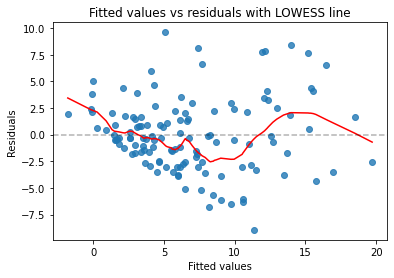

In [38]:
#for figure 4A.1
sns.regplot(x=reg4A3.fittedvalues, y=reg4A3.resid, data=datatrain, fit_reg = False)
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.title('Fitted values vs residuals with LOWESS line')
z1 = lowess(reg4A3.resid,reg4A3.fittedvalues, frac=1./5)
plt.plot(z1[:,0],z1[:,1],'red')
plt.axhline(color='Black', alpha=0.3, linestyle='--')  


In [39]:
#for figure 4A.3
datatrain['USG_e']=np.exp((datatrain['USG']/10))

Text(0.5, 1.0, 'Regression plot between SALARY and exponential of USG')

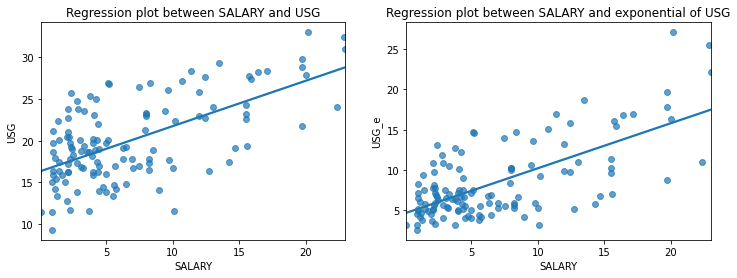

In [40]:
#for figure 4A.2 and 4A.3
tableau=['#1F77B4']
fig = plt.figure(figsize=(12,4)) 
axUSG = fig.add_subplot(1,2,1) 
axUSG_e = fig.add_subplot(1,2,2) 

sns.regplot(datatrain['SALARY'], datatrain['USG'], ci=None, scatter_kws={'s': 35, 'color': tableau[0], 'alpha': 
0.7}, ax=axUSG) 
axUSG.set_title('Regression plot between SALARY and USG')


sns.regplot(datatrain['SALARY'], datatrain['USG_e'], ci=None, scatter_kws={'s': 35, 'color': tableau[0], 'alpha': 
0.7}, ax=axUSG_e) 
axUSG_e.set_title('Regression plot between SALARY and exponential of USG')



In [41]:
#for table 4A.4
reg4A4 = smf.ols(formula = 'SALARY ~ Games + Minutes + USG_e + DWS ', data =datatrain).fit()
reg4A4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 SALARY   R-squared:                       0.652
Model:                            OLS   Adj. R-squared:                  0.641
Method:                 Least Squares   F-statistic:                     56.69
Date:                Mon, 27 Sep 2021   Prob (F-statistic):           7.38e-27
Time:                        23:50:06   Log-Likelihood:                -329.92
No. Observations:                 126   AIC:                             669.8
Df Residuals:                     121   BIC:                             684.0
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.0259      2.171      2.315      0.022       0.728       9.324
Games         -0.1611      0.039     -4.089      0.000      -0.239      -0.083
Minutes        0.0036      0.001      4.611      0.000       0.002       0.005
USG_e          0.4140      0.081      5.109      0.000       0.254       0.574
DWS            1.5701      0.352      4.459      0.000       0.873       2.267
==============================================================================
Omnibus:                        6.025   Durbin-Watson:                   1.841
Prob(Omnibus):                  0.049   Jarque-Bera (JB):                5.579
Skew:                           0.433   Prob(JB):                       0.0614
Kurtosis:                       3.558   Cond. No.                     1.40e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [42]:
#for table 4A.4
scores5 = cross_val_score(linreg, datatrain[['Games','Minutes','USG_e','DWS']], datatrain[['SALARY']], cv=10, scoring = 'neg_mean_squared_error')
cv_score5 = np.mean(scores5)
cv_rmse5= np.sqrt(-cv_score5)

print(cv_rmse5)

3.4658194592514295


In [43]:
#for figure 4A.4
datatrain['ORB_log']=np.log(datatrain['ORB'])

Text(0.5, 1.0, 'Regression plot SALARY and logarithmic transformation of ORB')

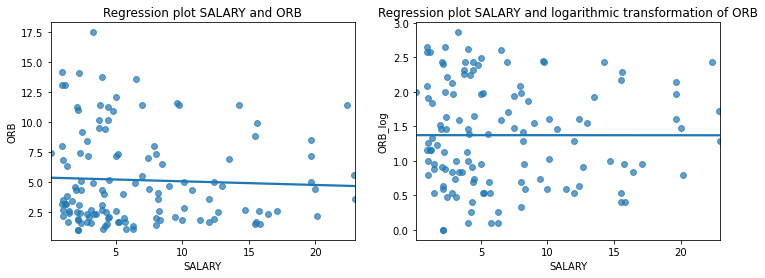

In [44]:
#for figure 4A.4 and 4A.5
tableau=['#1F77B4']
fig = plt.figure(figsize=(12,4)) 
axORB = fig.add_subplot(1,2,1) 
axORBlog = fig.add_subplot(1,2,2) 

sns.regplot(datatrain['SALARY'], datatrain['ORB'], ci=None, scatter_kws={'s': 35, 'color': tableau[0], 'alpha': 
0.7}, ax=axORB) 
axORB.set_title('Regression plot SALARY and ORB')


sns.regplot(datatrain['SALARY'], datatrain['ORB_log'], ci=None, scatter_kws={'s': 35, 'color': tableau[0], 'alpha': 
0.7}, ax=axORBlog) 
axORBlog.set_title('Regression plot SALARY and logarithmic transformation of ORB')



In [45]:
#for table 4A.5 and 4A.6
reg4A5 = smf.ols(formula = 'SALARY ~ Games + Minutes + USG_e + DWS + ORB_log', data =datatrain).fit()
reg4A5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 SALARY   R-squared:                       0.670
Model:                            OLS   Adj. R-squared:                  0.656
Method:                 Least Squares   F-statistic:                     48.73
Date:                Mon, 27 Sep 2021   Prob (F-statistic):           2.59e-27
Time:                        23:50:06   Log-Likelihood:                -326.58
No. Observations:                 126   AIC:                             665.2
Df Residuals:                     120   BIC:                             682.2
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.7419      2.182      1.715      0.089      -0.578       8.062
Games         -0.1845      0.040     -4.658      0.000      -0.263      -0.106
Minutes        0.0048      0.001      5.360      0.000       0.003       0.007
USG_e          0.4062      0.079      5.122      0.000       0.249       0.563
DWS            1.1304      0.385      2.937      0.004       0.368       1.893
ORB_log        1.2305      0.482      2.554      0.012       0.277       2.184
==============================================================================
Omnibus:                        4.249   Durbin-Watson:                   1.800
Prob(Omnibus):                  0.119   Jarque-Bera (JB):                4.269
Skew:                           0.239   Prob(JB):                        0.118
Kurtosis:                       3.764   Cond. No.                     1.44e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.44e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [46]:
#for table 4A.5
scores6 = cross_val_score(linreg, datatrain[['Games','Minutes','USG_e','DWS','ORB_log']], datatrain[['SALARY']], cv=10, scoring = 'neg_mean_squared_error')
cv_score6 = np.mean(scores6)
cv_rmse6= np.sqrt(-cv_score6)

print(cv_rmse6)

3.415511857674925


In [47]:
#for table 4A.6
reg4A5.mse_resid**0.5

3.3113998226276284

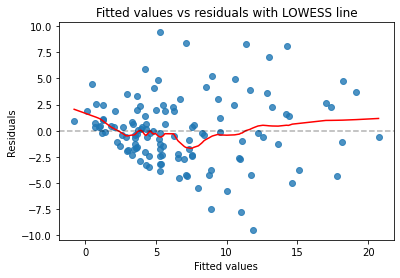

In [48]:
#for figure 4A.6
sns.regplot(x=reg4A5.fittedvalues, y=reg4A5.resid, data=datatrain, fit_reg = False)
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.title('Fitted values vs residuals with LOWESS line')
z1 = lowess(reg4A5.resid,reg4A5.fittedvalues, frac=1./5)
plt.plot(z1[:,0],z1[:,1],'red')
plt.axhline(color='Black', alpha=0.3, linestyle='--')  
plt.savefig('LOWESS2up.png')

In [49]:
#for RMSE test set
datatest['USG_e']=np.exp((datatest['USG']/10))
datatest['ORB_log']=np.log(datatest['ORB'])

In [50]:
#for RMSE test set
reg4A5_predict=reg4A5.predict({'DWS':datatest['DWS'],'USG_e': datatest['USG_e'],'Games': datatest['Games'],'Minutes': datatest['Minutes'],'ORB_log': datatest['ORB_log']})
RMSFE=(sum((datatest['SALARY']-reg4A5_predict)**2)/len(reg4A5_predict))**0.5
RMSFE

4.057498790601782

In [51]:
#for table 4A.7
features4A7 = datatrain[['Games', 'Minutes', 'USG_e', 'DWS' ,'ORB_log']]
features4A7 = sm.add_constant(features4A7) 
features4A7.head()

const  Games  Minutes      USG_e  DWS   ORB_log
Train_ID                                                 
1           1.0     76     2078   6.233887  2.7  2.219203
2           1.0     73     1490   6.685894  1.2  0.470004
3           1.0     81     3122  27.112639  4.4  0.788457
4           1.0     62     2222   9.679401  1.5  0.641854
5           1.0     48      489   5.697343  0.3  0.955511

In [52]:
#for table 4A.7
vif1 = []
for i in range(5):
    vif1.append(variance_inflation_factor(features4A7.values, i+1))
print(vif1)
np.mean(vif1)

[2.3375662622728495, 4.520365960425302, 1.583648851555059, 2.346867836899817, 1.4575561386536184]


2.449201009961329

### 4B. KNN regression 

In [53]:
from sklearn.neighbors import KNeighborsRegressor
def knn_test(predictors, response):
    
    neighbours=np.arange(1, 51)
    best_score = -np.inf
    
    for k in neighbours: 
        knn = KNeighborsRegressor(n_neighbors = k, metric='mahalanobis', metric_params={'V': datatrain[predictors].cov()}) 
        scores = cross_val_score(knn, datatrain[predictors], datatrain[response], cv=10, scoring = 'neg_mean_squared_error')
        # taking the average of scores across 10 folds
        cv_score = np.mean(scores)
        # use the cv score for model selection
        if cv_score >= best_score:
            best_score = cv_score
            best_knn = knn
    
    knn = best_knn
    cv_rmse= np.sqrt(-best_score)
    print('Chosen K: {}'.format(knn.n_neighbors))
    
    return cv_rmse 

In [54]:
#for table 4B.1
predictors4B1a= ['WS']
knn_test(predictors4B1a, 'SALARY')

Chosen K: 22


4.289985227772958

In [55]:
#for table 4B.1
predictors4B1b= ['DWS']
knn_test(predictors4B1b, 'SALARY')

Chosen K: 18


4.450867601896893

In [56]:
#for table 4B.1
predictors4B1c= ['OWS']
knn_test(predictors4B1c, 'SALARY')

Chosen K: 17


4.5979162423733575

In [57]:
#for table 4B.1
predictors4B1d= ['PER']
knn_test(predictors4B1d, 'SALARY')

Chosen K: 15


4.336102661240874

In [58]:
#for table 4B.1
predictors4B1e= ['USG']
knn_test(predictors4B1e, 'SALARY')

Chosen K: 12


4.310712905250468

In [59]:
#for table 4B.1
predictors4B1f= ['TS']
knn_test(predictors4B1f, 'SALARY')

Chosen K: 42


5.554105214646025

In [60]:
#for table 4B.1
predictors4B1g= ['ORtg']
knn_test(predictors4B1g, 'SALARY')

Chosen K: 29


5.449297458309666

In [61]:
#for table 4B.1
predictors4B1h= ['DRtg']
knn_test(predictors4B1h, 'SALARY')

Chosen K: 50


5.4765773265862006

In [62]:
#for table 4B.2
predictors4B2= ['WS','Minutes']
knn_test(predictors4B2, 'SALARY')

Chosen K: 24


4.253109094545758

In [63]:
#for table 4B.3
predictors4B3a= ['WS','Minutes','TOV']
knn_test(predictors4B3a, 'SALARY')

Chosen K: 16


4.35068248634925

In [64]:
#for table 4B.3
predictors4B3b= ['WS','Minutes','AST']
knn_test(predictors4B3b, 'SALARY')

Chosen K: 17


4.457930335465683

In [65]:
#for table 4B.4
predictors4B4a= ['WS','Minutes','ORB']
knn_test(predictors4B4a, 'SALARY')

Chosen K: 8


4.167175538938565

In [66]:
#for table 4B.4
predictors4B4b= ['WS','Minutes','TRB']
knn_test(predictors4B4b, 'SALARY')

Chosen K: 9


4.295450350466502

In [67]:
#for table 4B.4
predictors4B4c= ['WS','Minutes','DRB']
knn_test(predictors4B4c, 'SALARY')

Chosen K: 7


4.33710225628296

In [68]:
#for table 4B.4
predictors4B4d= ['WS','Minutes','BLK']
knn_test(predictors4B4d, 'SALARY')

Chosen K: 12


4.360233089464085

In [69]:
#for table 4B.4
predictors4B4e= ['WS','Minutes','STL']
knn_test(predictors4B4e, 'SALARY')

Chosen K: 20


4.375592481922406

In [70]:
#for table 4B.5
predictors4B5a= ['WS','Minutes','ORB','Age']
knn_test(predictors4B5a, 'SALARY')

Chosen K: 7


3.9240366212493205

In [71]:
#for table 4B.5 
predictors4B5b= ['WS','Minutes','ORB','Games']
knn_test(predictors4B5b, 'SALARY')

Chosen K: 7


3.821908247821242

In [72]:
#for RMSE test set
knnfinal = KNeighborsRegressor(n_neighbors = 7, metric='mahalanobis', metric_params={'V': datatrain[['WS','Minutes','Games','ORB']].cov()})
knnfinal.fit(datatrain[['WS','Minutes','Games','ORB']], datatrain[['SALARY']])
predictions = knnfinal.predict(datatest[['WS','Minutes','Games','ORB']])
test_rmse = np.sqrt(mean_squared_error(datatest[['SALARY']], predictions))
test_rmse

3.770474963423117

### 4C. Kernel regression

In [73]:
trainsplit = datatrain.sample(frac=0.8, random_state=1)
validsplit = datatrain[datatrain.index.isin(trainsplit.index)==False]
print(len(trainsplit), len(validsplit))

101 25


In [74]:
# USING PACKAGE FROM STATSMODEL TO RUN KERNEL REGRESSION WITH NADAYARA-WATSON ESTIMATOR
#for table 4C.1
from statsmodels.nonparametric.api import KernelReg
a14C1=KernelReg(endog= trainsplit['SALARY'], exog= trainsplit[['Minutes']], var_type='c', reg_type='lc')
b14C1=a14C1.fit(validsplit[['Minutes']])
RMSE_valid14C1=np.sqrt(np.mean((b14C1[0]- validsplit['SALARY'])**2))
RMSE_valid14C1

4.14765068640531

In [75]:
#for table 4C.1
a24C1=KernelReg(endog= trainsplit['SALARY'], exog= trainsplit[['Games']], var_type='o', reg_type='lc')
b24C1=a24C1.fit(validsplit[['Games']])
RMSE_valid24C1=np.sqrt(np.mean((b24C1[0]- validsplit['SALARY'])**2))
RMSE_valid24C1

4.7761747788594775

In [76]:
#for table 4C.1
a34C1=KernelReg(endog= trainsplit['SALARY'], exog= trainsplit[['Minutes','Games']], var_type='co', reg_type='lc')
b34C1=a34C1.fit(validsplit[['Minutes','Games']])
RMSE_valid34C1=np.sqrt(np.mean((b34C1[0]- validsplit['SALARY'])**2))
RMSE_valid34C1

3.798293220598363

In [77]:
#for table 4C.2
a14C2=KernelReg(endog= trainsplit['SALARY'], exog= trainsplit[['Minutes','Games','WS']], var_type='coc', reg_type='lc')
b14C2=a14C2.fit(validsplit[['Minutes','Games','WS']])
RMSE_valid14C2=np.sqrt(np.mean((b14C2[0]- validsplit['SALARY'])**2))
RMSE_valid14C2

4.000198680487876

In [78]:
#for table 4C.2
a24C2=KernelReg(endog= trainsplit['SALARY'], exog= trainsplit[['Minutes','Games','DWS']], var_type='coc', reg_type='lc')
b24C2=a24C2.fit(validsplit[['Minutes','Games','DWS']])
RMSE_valid24C2=np.sqrt(np.mean((b24C2[0]- validsplit['SALARY'])**2))
RMSE_valid24C2

3.1879020530031577

In [79]:
#for table 4C.2
a34C2=KernelReg(endog= trainsplit['SALARY'], exog= trainsplit[['Minutes','Games','OWS']], var_type='coc', reg_type='lc')
b34C2=a34C2.fit(validsplit[['Minutes','Games','OWS']])
RMSE_valid34C2=np.sqrt(np.mean((b34C2[0]- validsplit['SALARY'])**2))
RMSE_valid34C2

4.386461119130788

In [80]:
#for table 4C.3
a14C3=KernelReg(endog= trainsplit['SALARY'], exog= trainsplit[['Minutes','Games','DWS','TOV']], var_type='cocc', reg_type='lc')
b14C3=a14C3.fit(validsplit[['Minutes','Games','DWS','TOV']])
RMSE_valid14C3=np.sqrt(np.mean((b14C3[0]- validsplit['SALARY'])**2))
RMSE_valid14C3

3.180940693532498

In [81]:
#for table 4C.3
a24C3=KernelReg(endog= trainsplit['SALARY'], exog= trainsplit[['Minutes','Games','DWS','AST']], var_type='cocc', reg_type='lc')
b24C3=a24C3.fit(validsplit[['Minutes','Games','DWS','AST']])
RMSE_valid24C3=np.sqrt(np.mean((b24C3[0]- validsplit['SALARY'])**2))
RMSE_valid24C3

3.3422151516292713

In [82]:
#for table 4C.3
a34C3=KernelReg(endog= trainsplit['SALARY'], exog= trainsplit[['Minutes','Games','DWS','Age']], var_type='coco', reg_type='lc')
b34C3=a34C3.fit(validsplit[['Minutes','Games','DWS','Age']])
RMSE_valid34C3=np.sqrt(np.mean((b34C3[0]- validsplit['SALARY'])**2))
RMSE_valid34C3

4.377844879598455

In [83]:
#for RMSE test set
atest=KernelReg(endog= datatrain['SALARY'], exog= datatrain[['Minutes','Games','DWS','TOV']], var_type='cocc', reg_type='lc')
btest=atest.fit(datatest[['Minutes','Games','DWS','TOV']])
RMSE_test=np.sqrt(np.mean((btest[0]- datatest['SALARY'])**2))
RMSE_test

4.021469426241351

# Appendix 

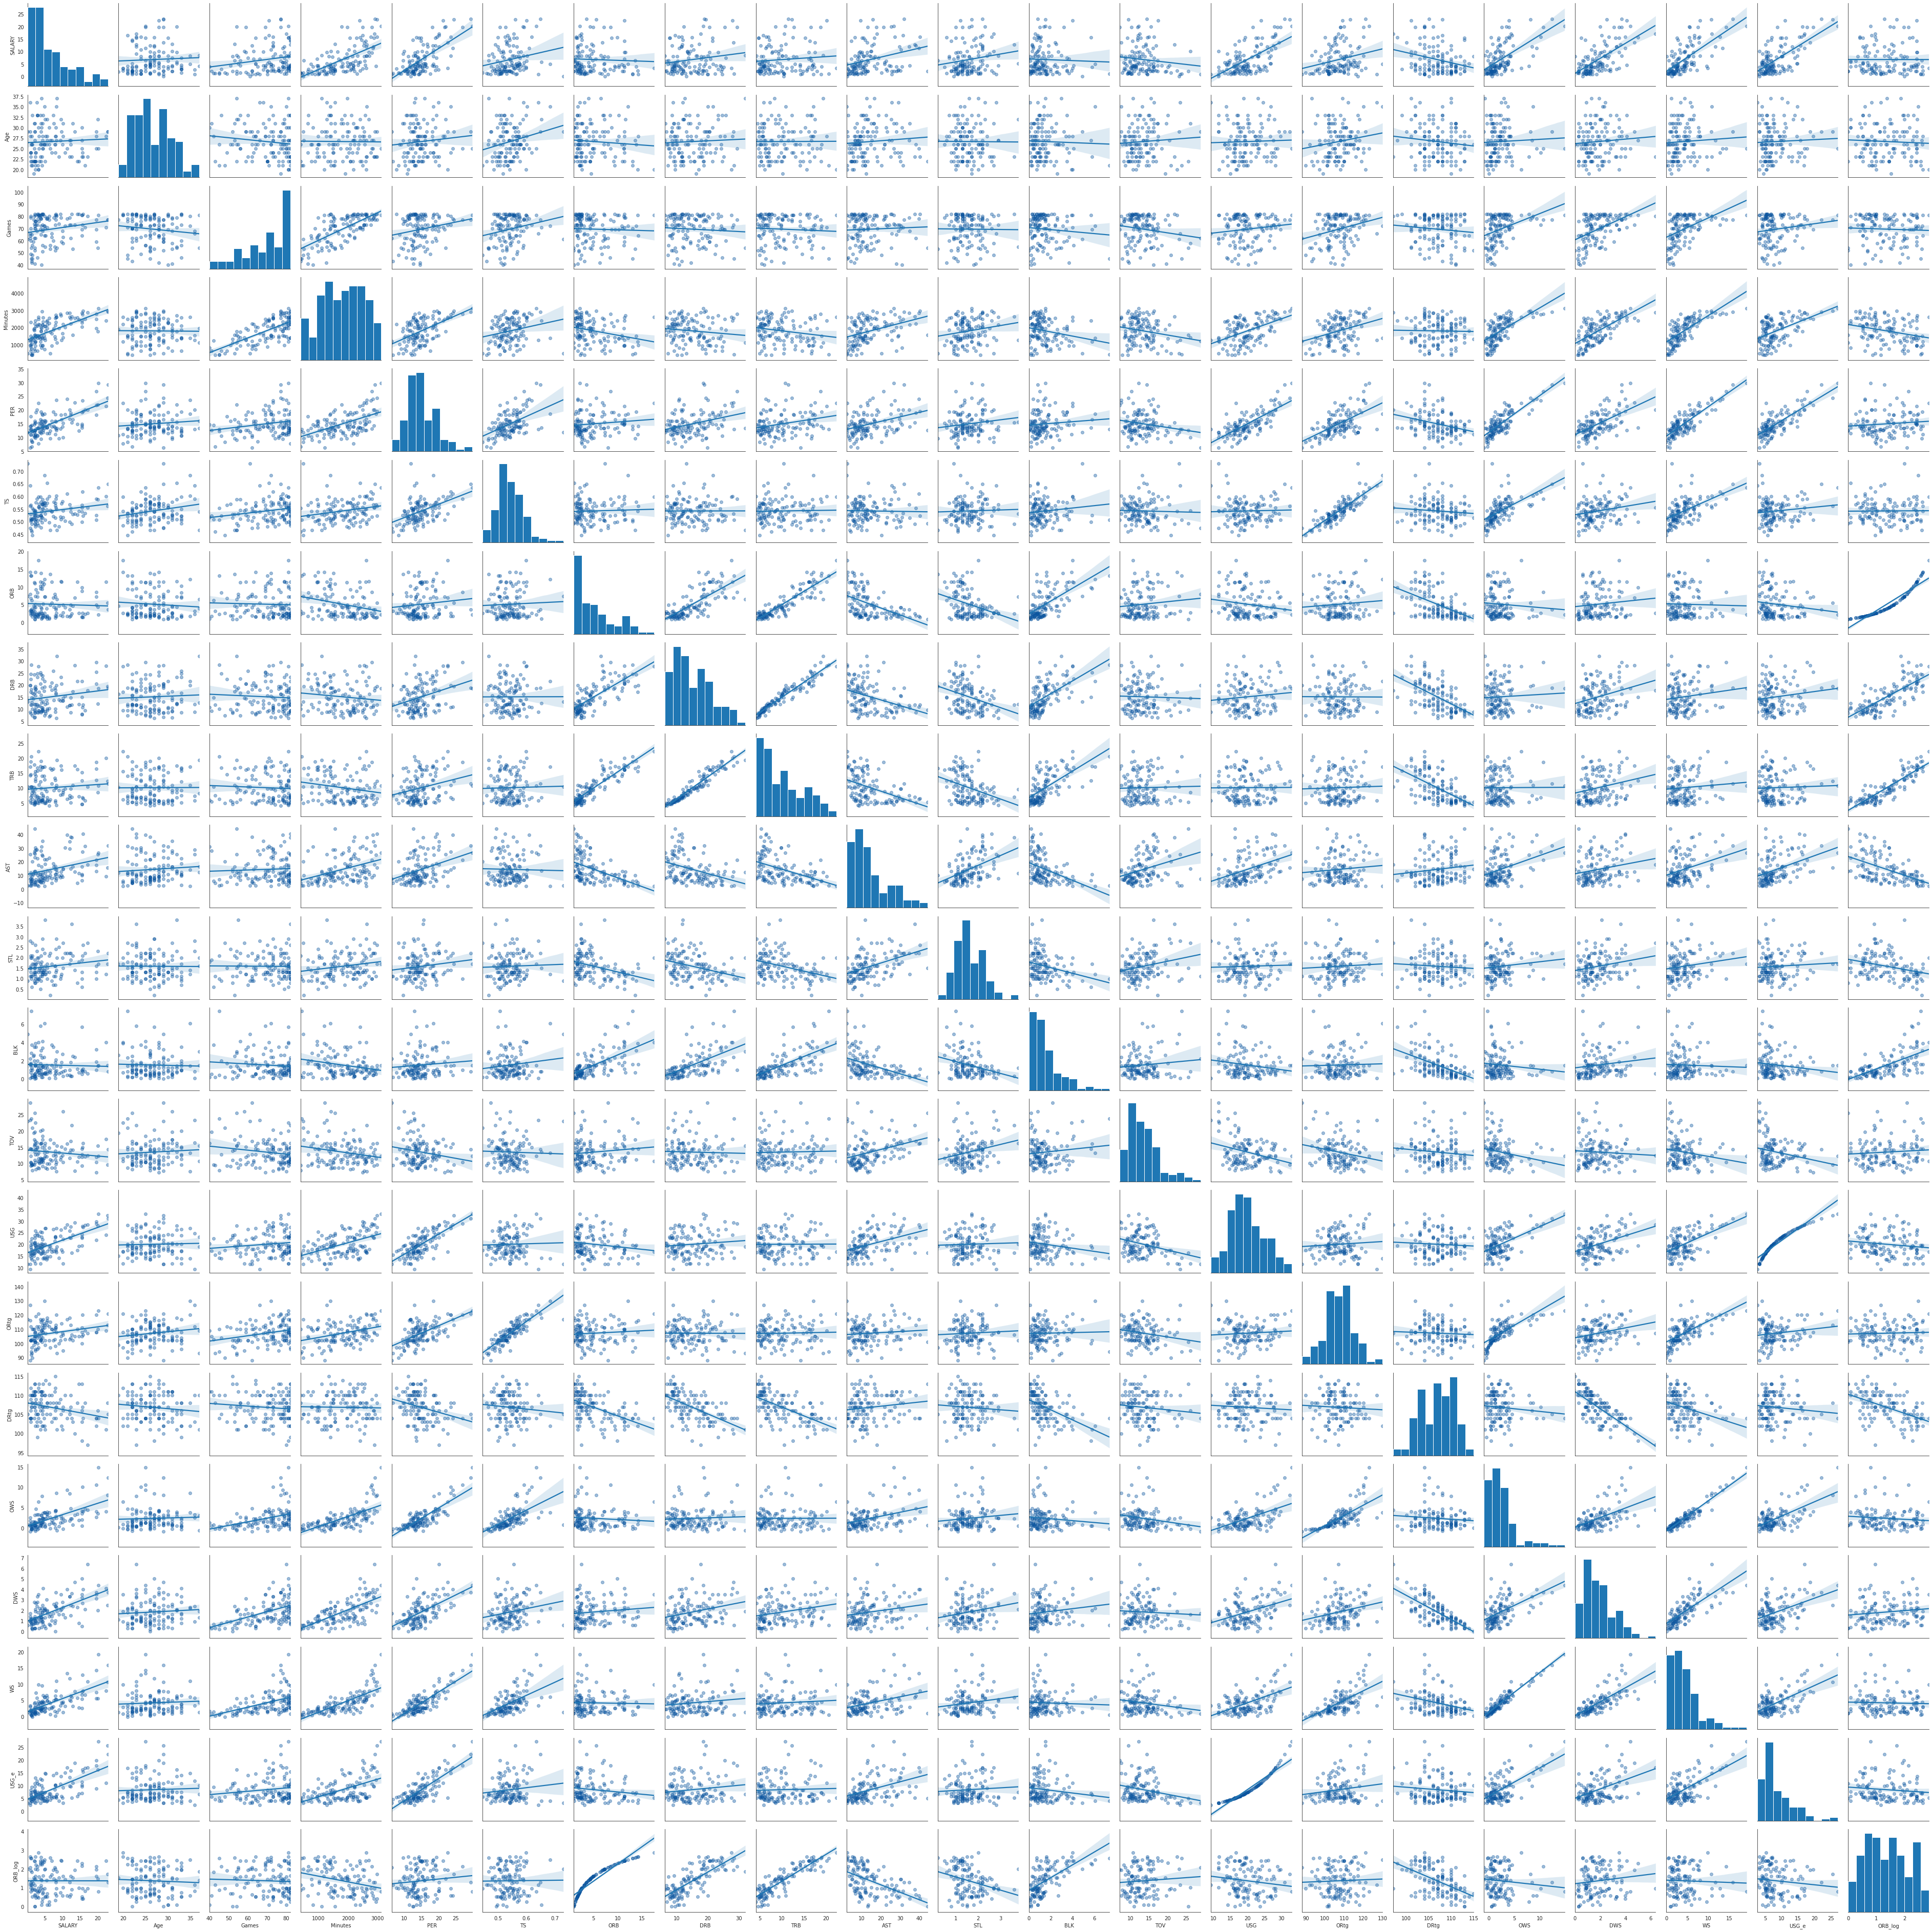

In [84]:
#appendix c
with sns.axes_style('white'):
    g=sns.pairplot(datatrain, kind='reg', 
                   plot_kws={'scatter_kws' :{'color': sns.color_palette('Blues')[-1], 'alpha': 0.4}})
plt.tight_layout()
